In [9]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
from scipy.integrate import quad
import pandas as pd

# 1. Найти аналитическое решение задачи Коши

$$\frac{dy}{dt} = y\frac{2t-1}{t^2}$$
$$\frac{dy}{dt} = 2\frac{dt}{t}-\frac{dt}{t^2}$$
$$ \log{y} = \log{t^2} + \frac{1}{t} + C = \log{t^2} + \log({C\exp({\frac{1}{t}})}) $$
$$ y = Ct^2\exp({\frac{1}{t}}) $$
$$ y(1) = C*1*\exp({1}) = 1 \Rightarrow C = \exp({-1}) $$
$$ y = t^2*\exp({\frac{1}{t}-1}) $$

In [10]:
def realFunc(t):
    return (t**2)*np.exp(1/t - 1)

# 2. Составить программу вычисления решения методом Эйлера с заданной точностью, используя правило Рунге. Найти решение задачи с точностью , число точек N и шаг, при котором точность достигается. Построить график решения.

In [11]:
eps = 10**(-6)

#начальные условия
t0 = 1
t1 = 3
y0 = 1

#Функция справа
def fRight(t, y):
    return ((2*t - 1)/(t**2))*y

#Вспомогательная функция для подсчёта значений на каждом шаге
def funcH(y, h, t):
    return(y + h * fRight(t, y))

In [12]:
#Метод Эйлера с заданым шагом
def Euler (h):
    n = round(((t1-t0)/h)+1)
    y = np.zeros(n)
    y[0] = y0
    for i in range(1, n):
        y[i] = funcH(y[i-1], h, t0 + h*(i-1))
    return y

#Оценка по рунге
def epsEuler ():
    h = 0.5
    err = [0.1]
    help1 = []
    help2 = []
    help1 = Euler(h)
    while( max(err) > eps ):
        err = np.zeros(round((t1-t0)/h)+1)
        h /= 2
        help2 = Euler(h)
        u = 0
        for i in range(len(help1)):
            err[i] = np.abs(help1[i]-help2[u])
            u += 2
        help1 = help2
    return h 

In [13]:
hFinal = epsEuler()
print("Оптимальное значение шага:", hFinal)
print("Оптимальное число точек:", int((t1-t0)/hFinal))

Оптимальное значение шага: 4.76837158203125e-07
Оптимальное число точек: 4194304


Построим графики точного решения и того, что было получено

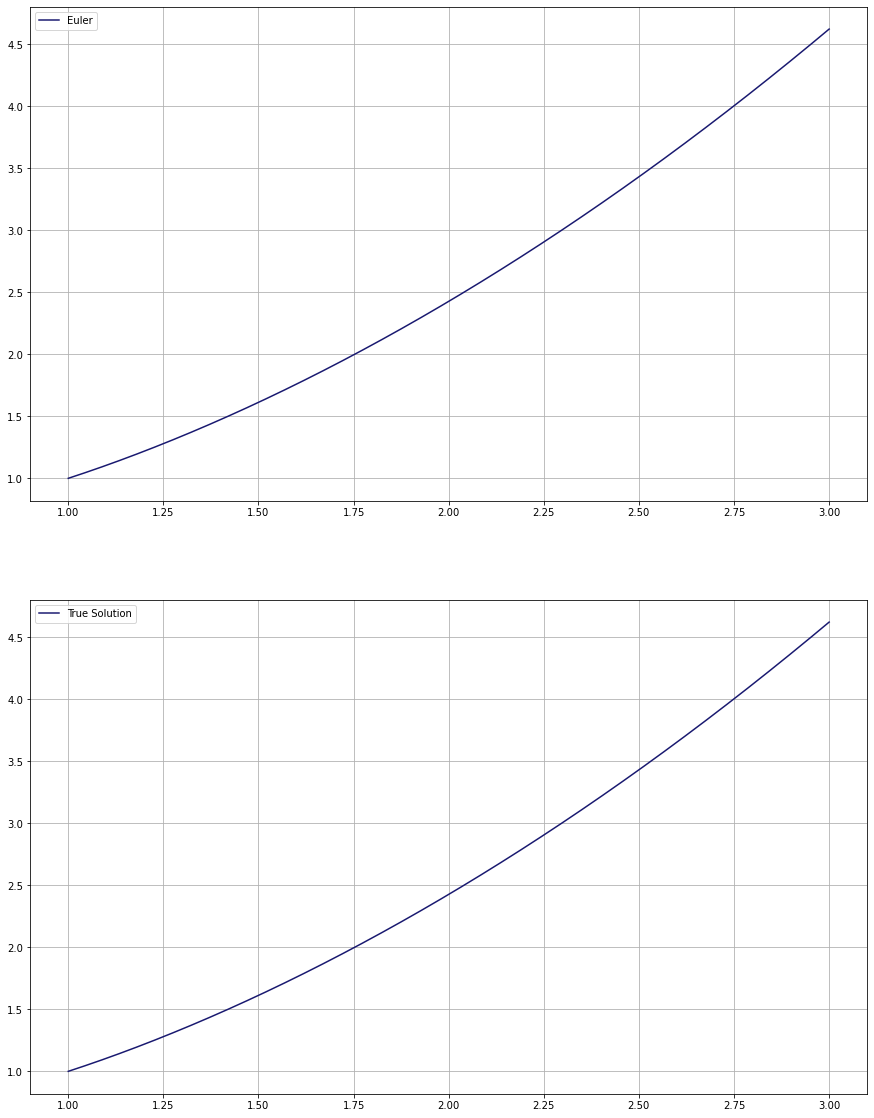

In [14]:
yFinal = Euler(hFinal)

x1 = np.zeros(int((t1-t0)/hFinal)+1)
for i in range(int((t1-t0)/hFinal)+1):
    x1[i] = t0 + i*hFinal
    
x2 = np.linspace(t0, t1, int((t1-t0)/hFinal)+1)

fig, axs = plt.subplots(2, 1, figsize = (15, 20))
axs[0].plot(x1, yFinal, label = 'Euler', color = 'midnightblue')
axs[1].plot(x2, realFunc(x2), label = 'True Solution', color = 'midnightblue')
for i in range (2):
    axs[i].legend()
    axs[i].grid()

Невооруженным взглядом видно, что графики похожи. Следовательно, думаю, разумно сказать, что поставленная задача выполнена правильно

# 3. Составить программу вычисления решения с заданной точностью методом индивидуального варианта. Найти решение задачи с заданной точностью, число точек N и шаг, при котором точность достигается. Построить график решения задачи

Метод Рунге-Кутты 3-го порядка (вариант I)

$$ y_{i+1} = y_i + \frac{h}{6} (K_1 + 4K_2 + K_3), $$ где 
$$ K_1 = f(t_i, y_i) $$
$$ K_2 = f(t_i + \frac{h}{2}, y_i + \frac{hK_1}{2}) $$
$$ K_3 = f(t_i + h, y_i - hK_1 + 2hK_2) $$

In [26]:
#функция справа от "="
def FR(t, y):
    return ((2*t - 1)/(t**2))*y

def K1(t, y):
    return FR(t, y)

def K2(t, y, h, K1):
    return FR(t + h/2, y + (h * K1)/2)

def K3(t, y, h, K1, K2):
    return FR(t + h, y - h*K1 + 2*h*K2)

#вспомогательная функция для возвращения y_i+1
def funcH1 (y, h, K1, K2, K3):
    return y + (h/6)*(K1 + 4*K2 + K3)

In [27]:
#Метод Рунге-Кутты с заданным шагом
def RungKutt (h):
    n = round(((t1-t0)/h)+1)
    y = np.zeros(n)
    y[0] = y0
    for i in range(1, n):
        K1ex = K1(t0 + (i-1)*h, y[i-1])
        K2ex = K2(t0 + (i-1)*h, y[i-1], h, K1ex)
        K3ex = K3(t0 + (i-1)*h, y[i-1], h, K1ex, K2ex)
        y[i] = funcH1(y[i-1], h, K1ex, K2ex, K3ex)
    return y

#Оценка по рунге
def epsRungKutt ():
    h = 0.1
    err = [0.1]
    help1 = []
    help2 = []
    help1 = RungKutt (h)
    while( max(err) >= eps ):
        err = np.zeros(round((t1-t0)/h)+1)
        h /= 2
        help2 = RungKutt(h)
        u = 0
        for i in range(len(help1)):
            err[i] = np.abs(help1[i]-help2[u])
            u += 2
        help1 = help2
    return h 

In [28]:
hRungKutt = epsRungKutt()
print("Оптимальное значение шага:", hRungKutt)
print("Оптимальное число точек:", int((t1-t0)/hRungKutt))

Оптимальное значение шага: 0.00625
Оптимальное число точек: 320


Вновь построим графики точного решения и того, что было получено

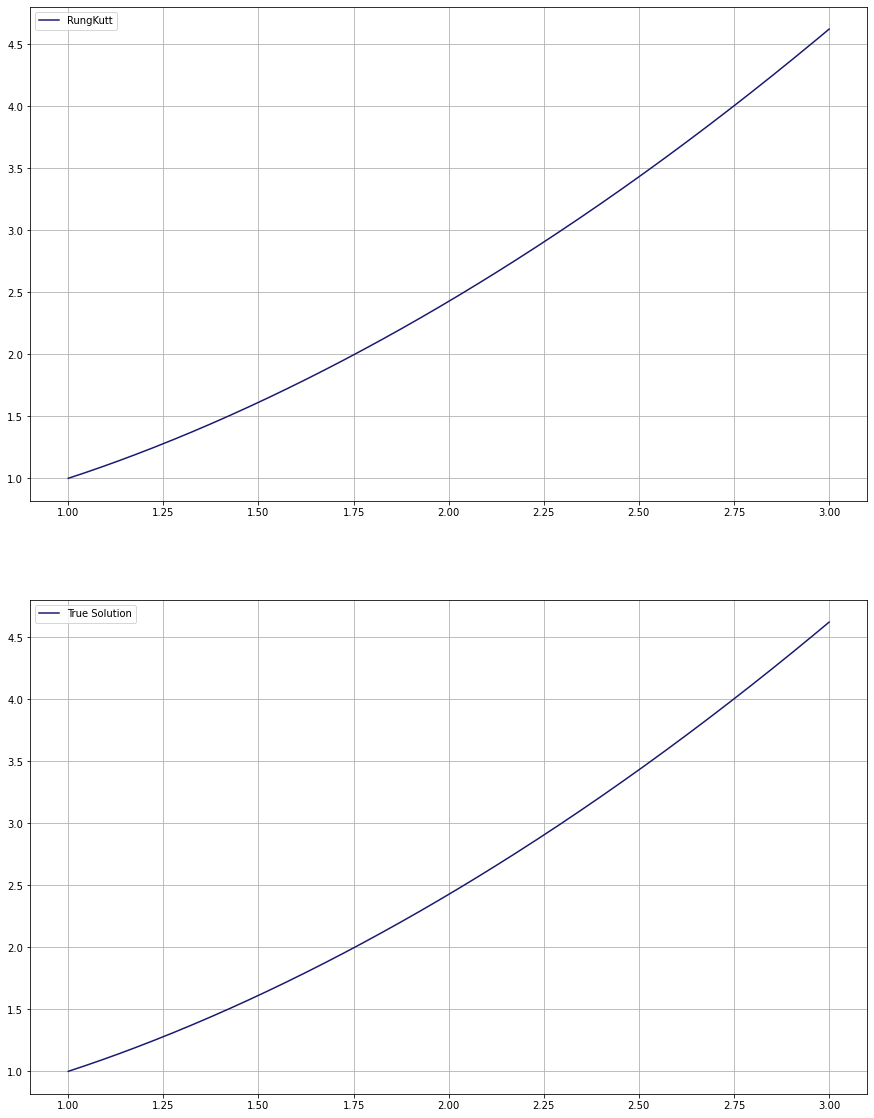

In [30]:
yFinal1 = RungKutt(hRungKutt)

x1 = np.zeros(int((t1-t0)/hRungKutt)+1)
for i in range(int((t1-t0)/hRungKutt)+1):
    x1[i] = t0 + i*hRungKutt
    
x2 = np.linspace(t0, t1, int((t1-t0)/hRungKutt)+1)

fig, axs = plt.subplots(2, 1, figsize = (15, 20))
axs[0].plot(x1, yFinal1, label = 'RungKutt', color = 'midnightblue')
axs[1].plot(x2, realFunc(x2), label = 'True Solution', color = 'midnightblue')
for i in range (2):
    axs[i].legend()
    axs[i].grid()

Как видно выше, при использовании данной вариации метода Рунге-Кутты получили значительный выигрыш в количестве шагов, если сравнивать с методом Эйлера, что говорит о более высоком порядке сходимости